# Imports

In [1]:
# import os
import torch
# import time
import cv2
import numpy as np
# import pandas as pd
from PIL import Image

# import torch.nn as nn
# from tqdm import tqdm
# import seaborn as sns
# import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
# from collections import Counter
# from torch.utils.data import Subset
from torchvision import datasets 
from torchvision import transforms 
# from torch.utils.data import DataLoader, Subset, random_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


## UTILS

In [2]:
def plot_image(image, title_image="Imagem", cmap='gray'):
    # Converte de BGR para RGB se a imagem for colorida
    if len(image.shape) == 3:  # Imagem colorida
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap=cmap)
    plt.title(title_image)
    plt.axis('off')  # Oculta os eixos
    plt.show()


In [3]:
def is_grayscale_rgb(image: Image.Image) -> bool:
    # Converter imagem para array NumPy
    img_array = np.array(image)
    
    # Verificar se a imagem é RGB
    if img_array.ndim == 3 and img_array.shape[2] == 3:
        # Comparar os canais R, G e B
        return np.all(img_array[..., 0] == img_array[..., 1]) and np.all(img_array[..., 1] == img_array[..., 2])
    return False

In [4]:
def show_image_and_histogram(img, title_image="Image", title_hist="Histogram", bins=256):
    # plotar imagem de um lado e do outro o histograma
    plt.figure(figsize=(15, 5))

    # Adicionar a imagem
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title(title_image)
    plt.axis("off")

    # Adicionar o histograma da imagem
    plt.subplot(1, 2, 2)
    plt.hist(np.array(img).ravel(), bins=bins, color="black")
    plt.title(title_hist)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

In [5]:
train_path = '/kaggle/input/kermany2018/OCT2017 /train'
test_path = '/kaggle/input/kermany2018/OCT2017 /test'
val_path = '/kaggle/input/kermany2018/OCT2017 /val'

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [7]:
dataset_val = datasets.ImageFolder(root=val_path)

# Analysis

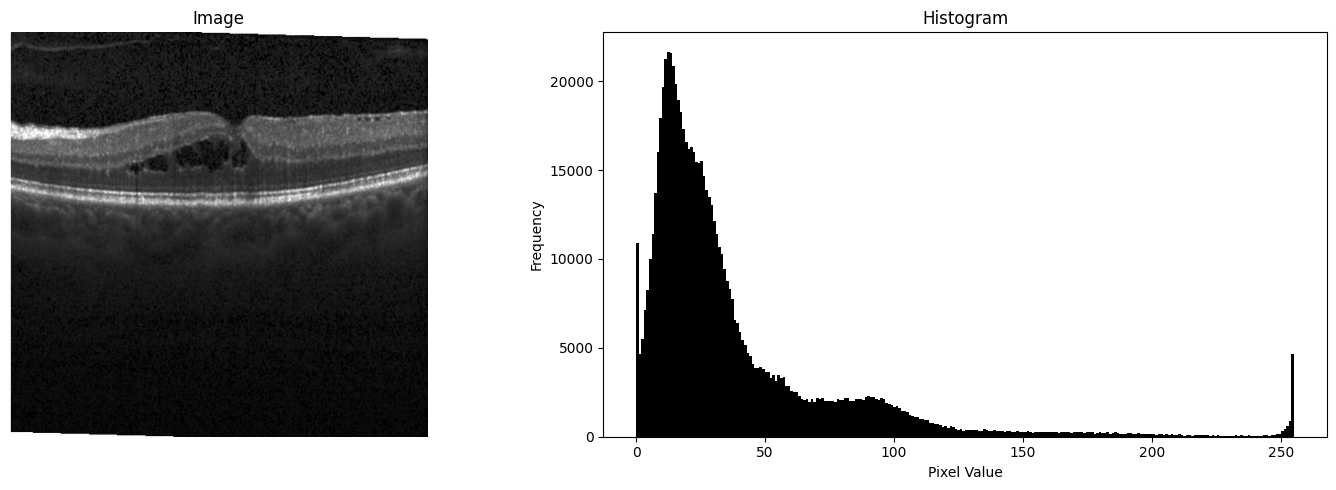

In [8]:
index = 10
img, label = dataset_val[index]
show_image_and_histogram(img, title_image="Image", title_hist="Histogram", bins=256)

In [9]:
mean, std = 0.18484567, 0.15903676

## Resize

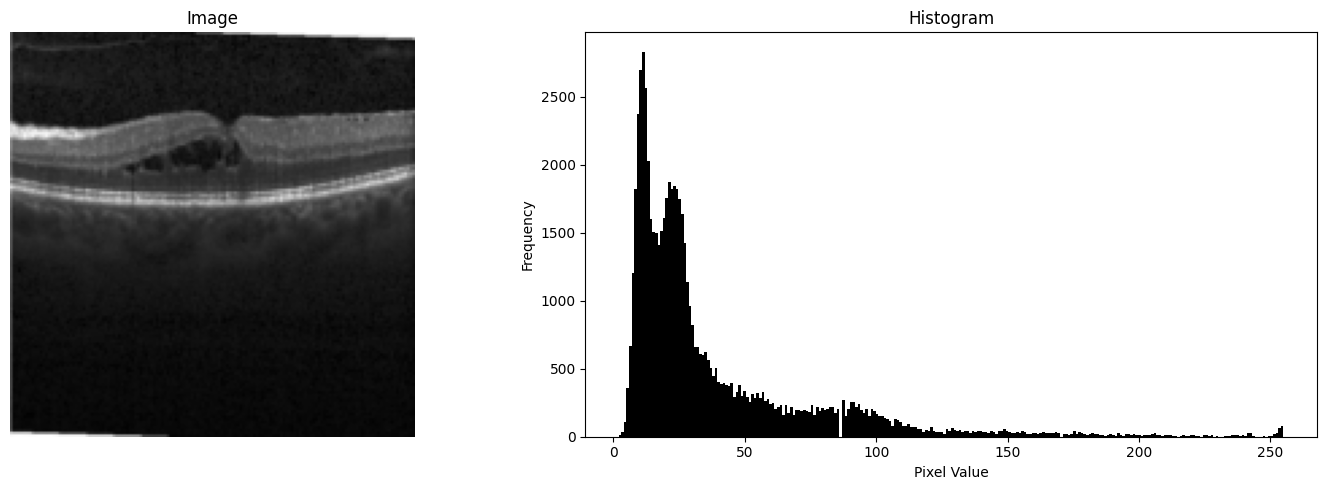

In [10]:
resize = transforms.Resize((150, 150))

T = transforms.Compose([transforms.Resize((150, 150))])
show_image_and_histogram(T(img), title_image="Image", title_hist="Histogram", bins=256)

## Resize e CenterCrop

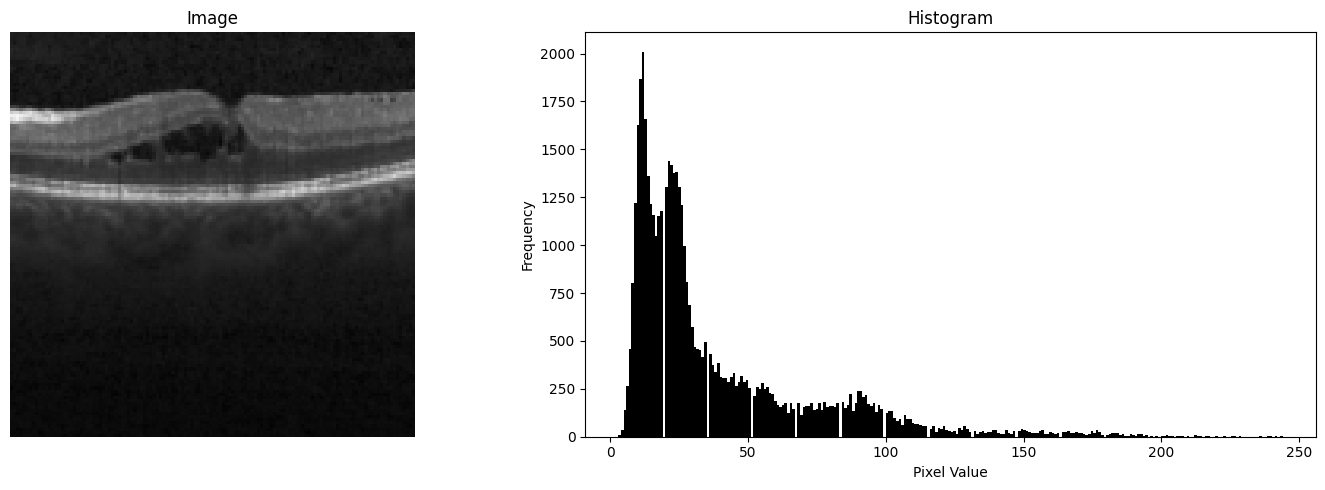

In [11]:
T = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.CenterCrop((128, 128))
    ])

show_image_and_histogram(T(img), title_image="Image", title_hist="Histogram", bins=256)

# Preprocessing 

In [12]:
T = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.CenterCrop((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean] * 3, std=[std] * 3),
    ])
print(T(img))


tensor([[[-0.3732, -0.4472, -0.4965,  ..., -0.5212, -0.6445, -0.6938],
         [-0.4225, -0.4965, -0.4719,  ..., -0.4225, -0.4965, -0.5458],
         [-0.4719, -0.5212, -0.4225,  ..., -0.5705, -0.5458, -0.6445],
         ...,
         [-0.9157, -0.8910, -1.0390,  ..., -0.9404, -0.9157, -0.9404],
         [-0.9650, -0.9650, -0.9157,  ..., -0.9897, -0.8910, -0.9404],
         [-0.9157, -0.9157, -0.9404,  ..., -0.8910, -0.8910, -0.9404]],

        [[-0.3732, -0.4472, -0.4965,  ..., -0.5212, -0.6445, -0.6938],
         [-0.4225, -0.4965, -0.4719,  ..., -0.4225, -0.4965, -0.5458],
         [-0.4719, -0.5212, -0.4225,  ..., -0.5705, -0.5458, -0.6445],
         ...,
         [-0.9157, -0.8910, -1.0390,  ..., -0.9404, -0.9157, -0.9404],
         [-0.9650, -0.9650, -0.9157,  ..., -0.9897, -0.8910, -0.9404],
         [-0.9157, -0.9157, -0.9404,  ..., -0.8910, -0.8910, -0.9404]],

        [[-0.3732, -0.4472, -0.4965,  ..., -0.5212, -0.6445, -0.6938],
         [-0.4225, -0.4965, -0.4719,  ..., -0

## Imagem com Filtro da Mediana

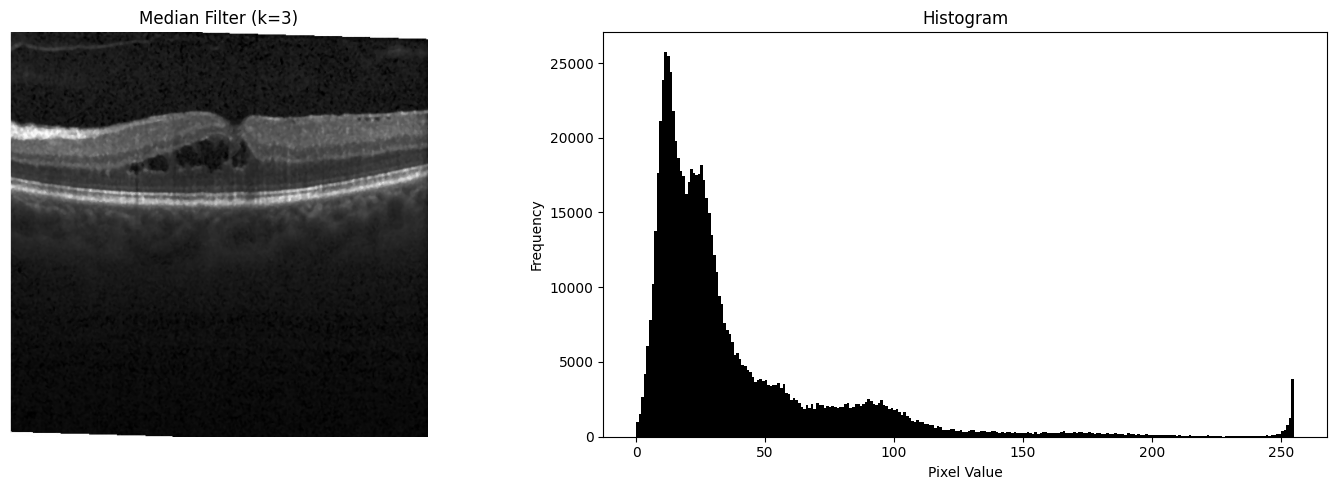

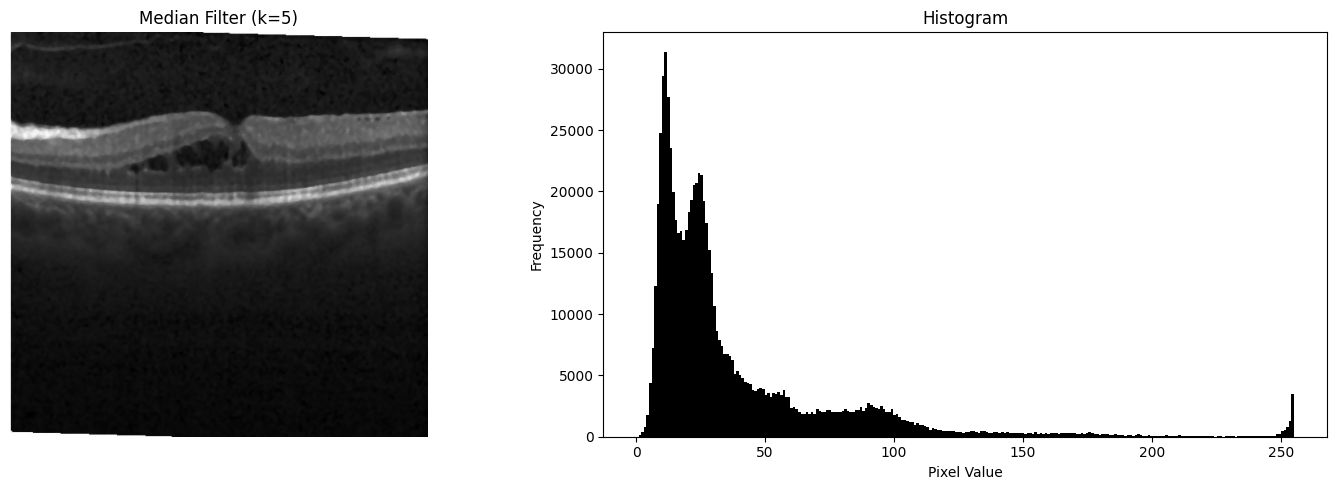

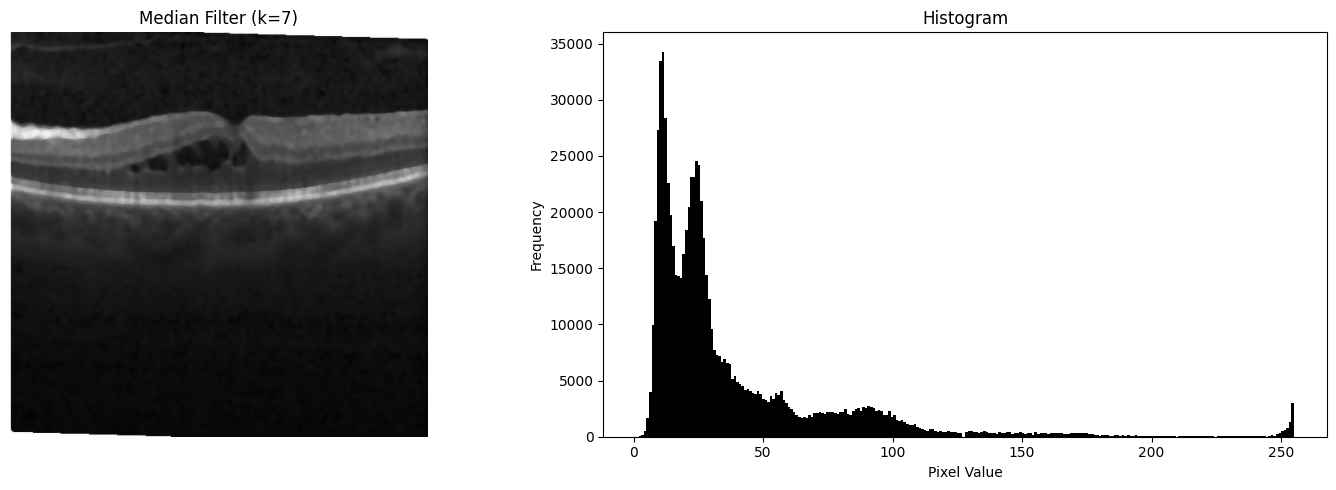

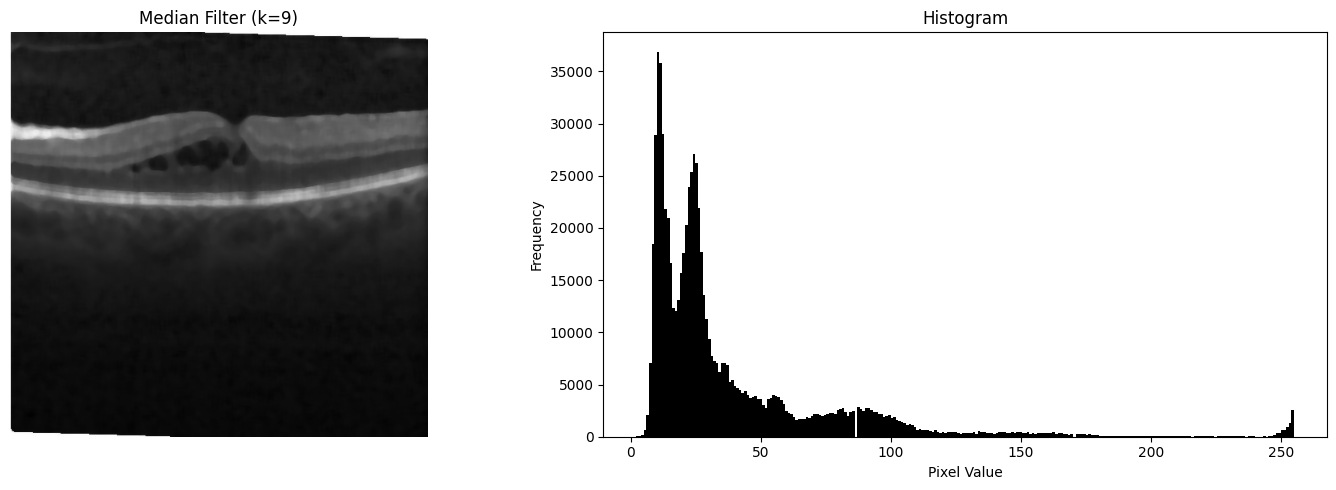

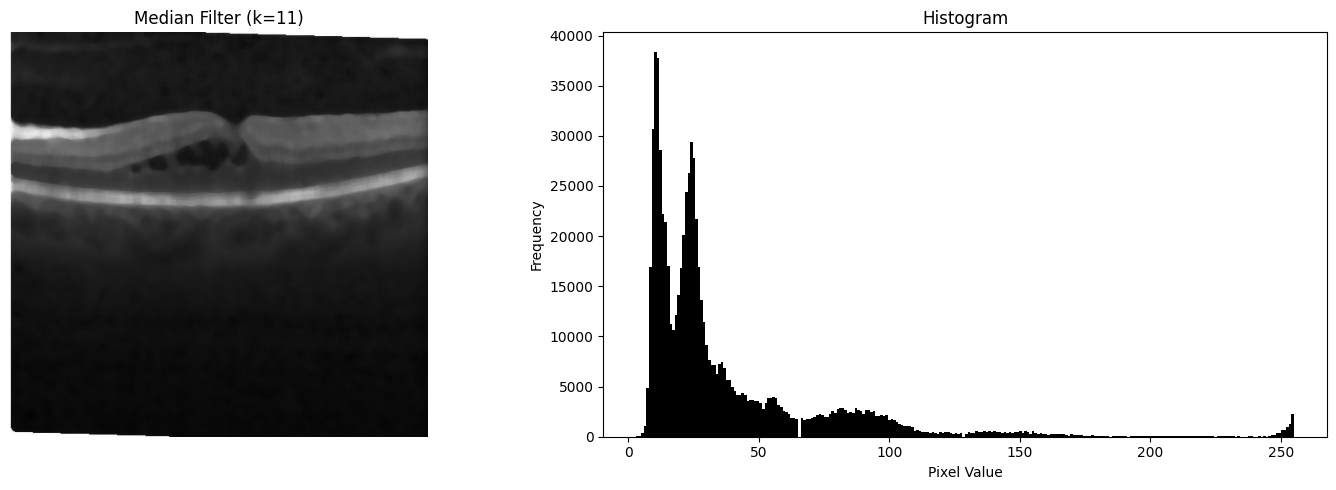

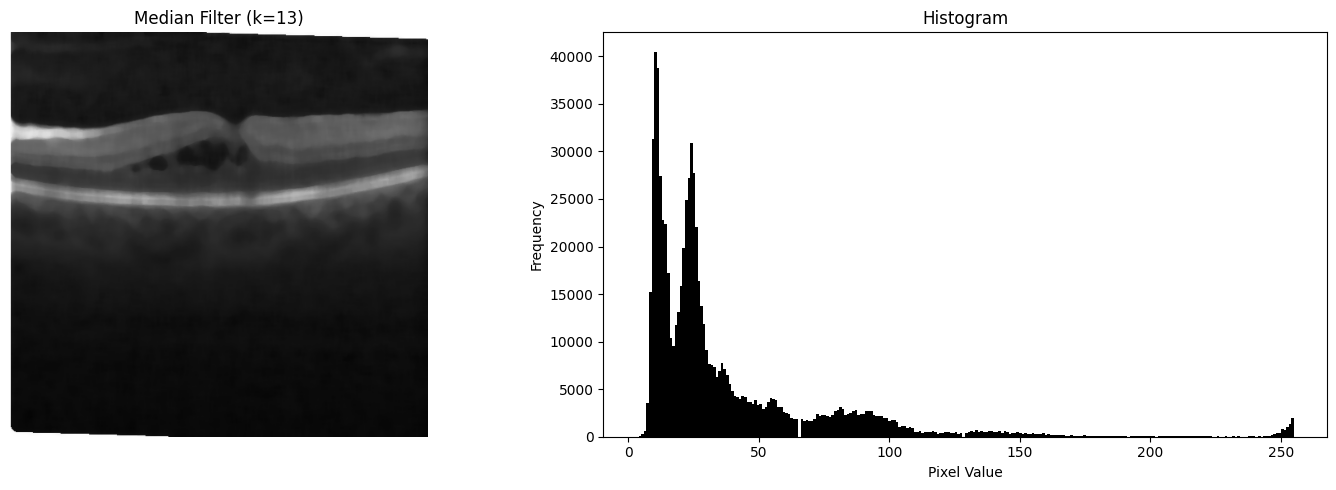

In [13]:
def median_filter(image, ksize: int = 5) -> Image:
    return Image.fromarray(cv2.medianBlur(np.array(image), ksize=ksize))


ksizes = [3, 5, 7, 9, 11, 13]

for k in ksizes:
    show_image_and_histogram(median_filter(img, ksize=k), title_image=f"Median Filter (k={k})", title_hist="Histogram", bins=256)

## CLAHE

#### Observação
O artigo não fala sobre os parametros(clipLimit e tileGridSize) utilizados no Algoritmo CLAHE.

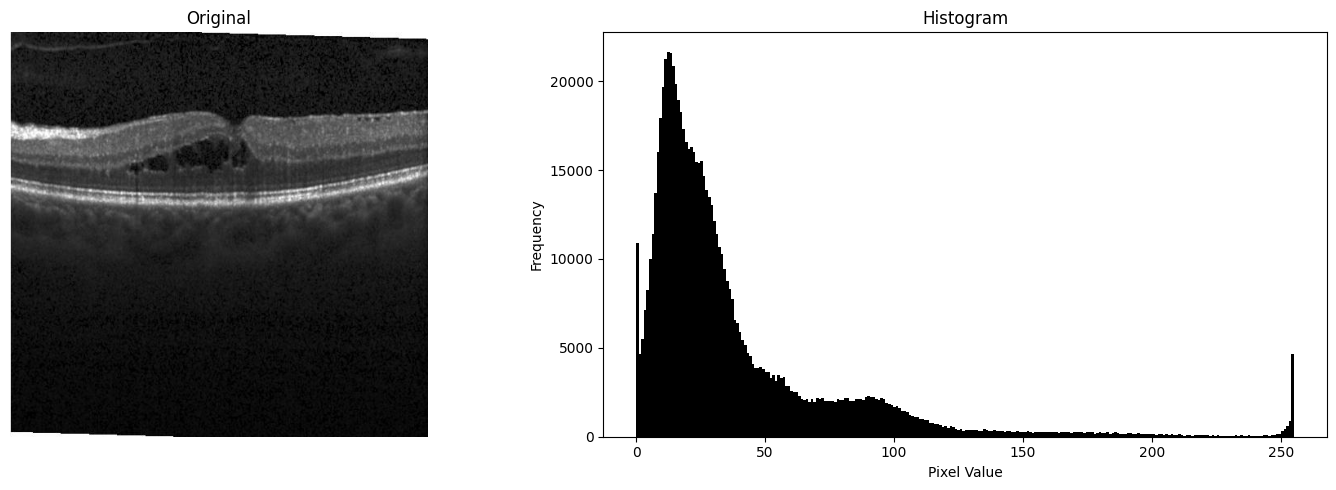

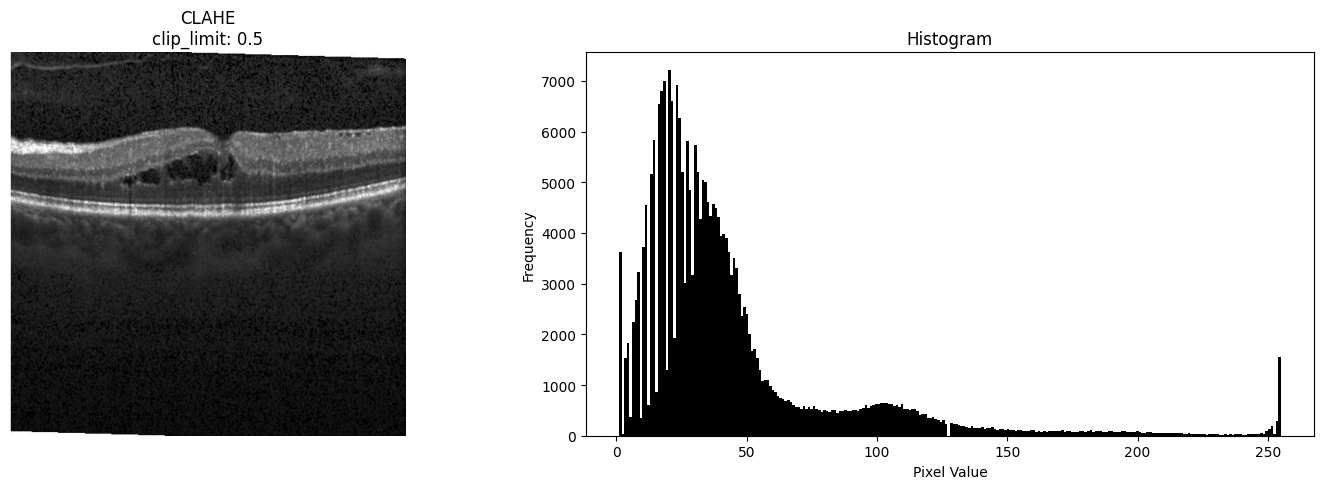

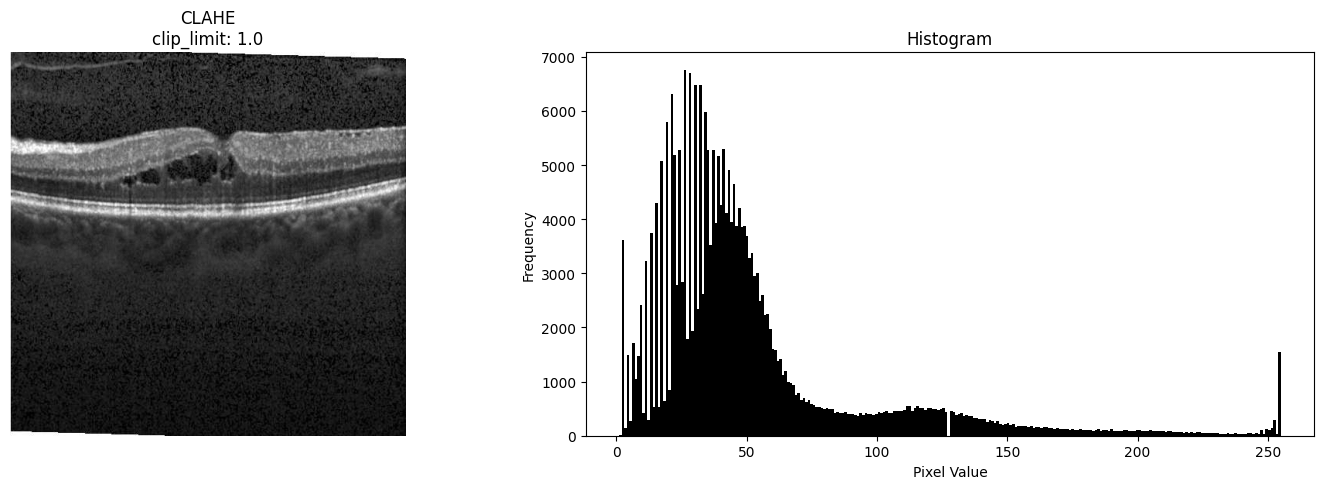

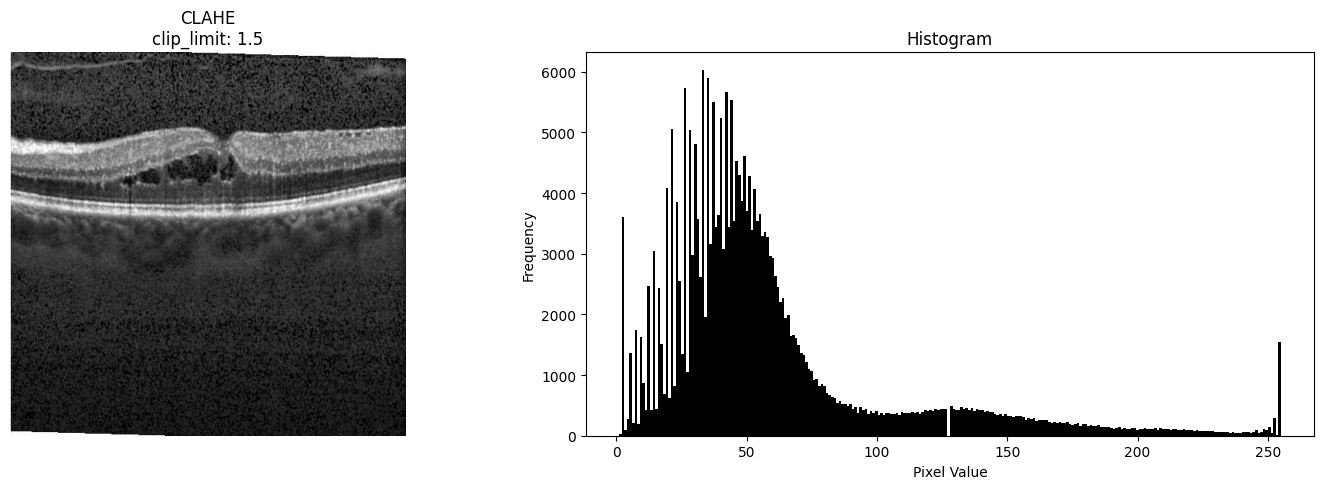

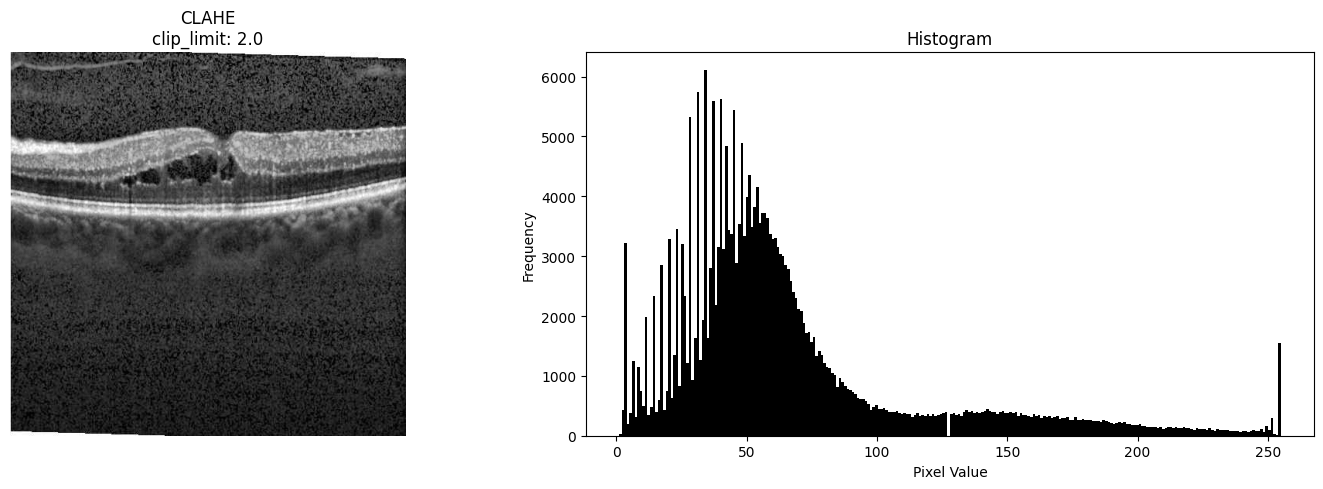

In [14]:
def clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY) if len(np.array(image).shape) == 3 else np.array(image)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return Image.fromarray(clahe.apply(gray_image))


show_image_and_histogram(img, title_image="Original", title_hist="Histogram", bins=256)
# clip_limit = 2.0
tile_grid_size = (8, 8)

clips = [0.5, 1.0, 1.5, 2.0]
for clip in clips:
    temp = clahe(img, clip_limit=clip, tile_grid_size=tile_grid_size)
    show_image_and_histogram(temp, title_image=f"CLAHE\nclip_limit: {clip}", title_hist="Histogram", bins=256)
    

### Segmentação

In [15]:
def otsu(image):
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY) if len(np.array(image).shape) == 3 else np.array(image)
    threshold, otsu = cv2.threshold(np.array(gray_image), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return Image.fromarray(otsu)

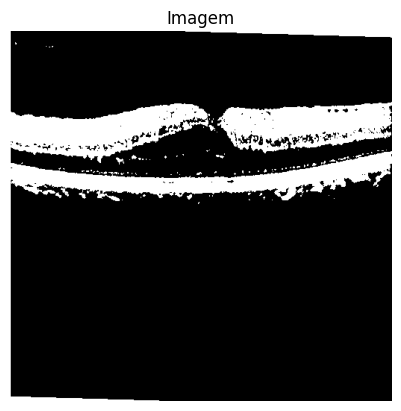

In [16]:
plot_image(np.array(otsu(img)))

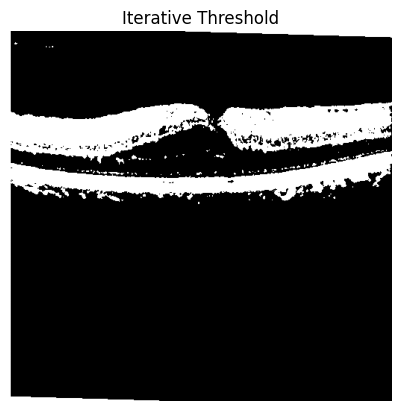

In [17]:
def iterative_threshold(image, delta=0.1):
    image = np.array(image)
    threshold = np.mean(image)
    while True:
        group1, group2 = image[image > threshold], image[image <= threshold]
        m1 = np.mean(group1) if len(group1) > 0 else 0
        m2 = np.mean(group2) if len(group2) > 0 else 0
        new_threshold = (m1 + m2) / 2
        if abs(threshold - new_threshold) < delta:
            return new_threshold
        threshold = new_threshold

# segmentar a imagem com o threshold obtido pelo método iterativo
threshold = int(iterative_threshold(img, delta=0.1))
thresholded = (np.array(img) > threshold).astype(np.uint8) * 255  

plot_image(thresholded, title_image="Iterative Threshold")

### Diferentes pipelines

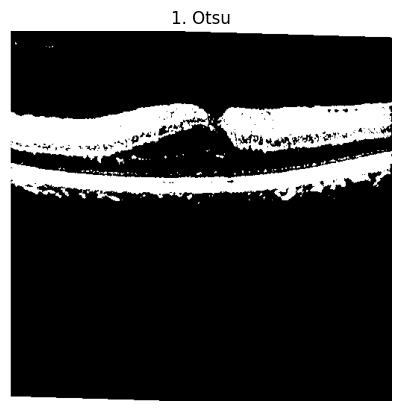

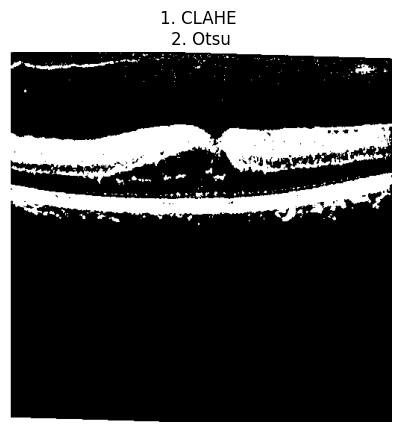

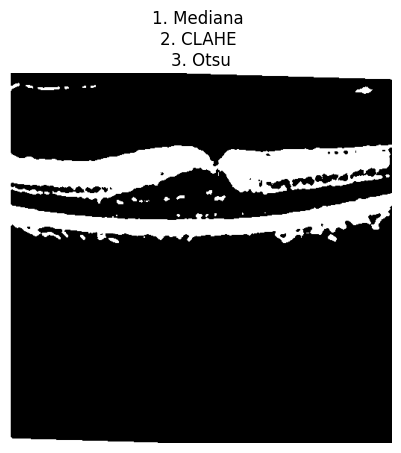

In [18]:
T1 = transforms.Compose([
    transforms.Lambda(lambda x: clahe(x)),
    transforms.Lambda(lambda x: otsu(x)),
    ])

T2 = transforms.Compose([
    transforms.Lambda(lambda x: median_filter(x)),
    transforms.Lambda(lambda x: clahe(x)),
    transforms.Lambda(lambda x: otsu(x)),
    ])


plot_image(np.array(otsu(img)), title_image="1. Otsu")
plot_image(np.array(T1(img)), title_image="1. CLAHE \n2. Otsu")
plot_image(np.array(T2(img)), title_image="1. Mediana \n2. CLAHE \n3. Otsu")


## Operações de Morfologia

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


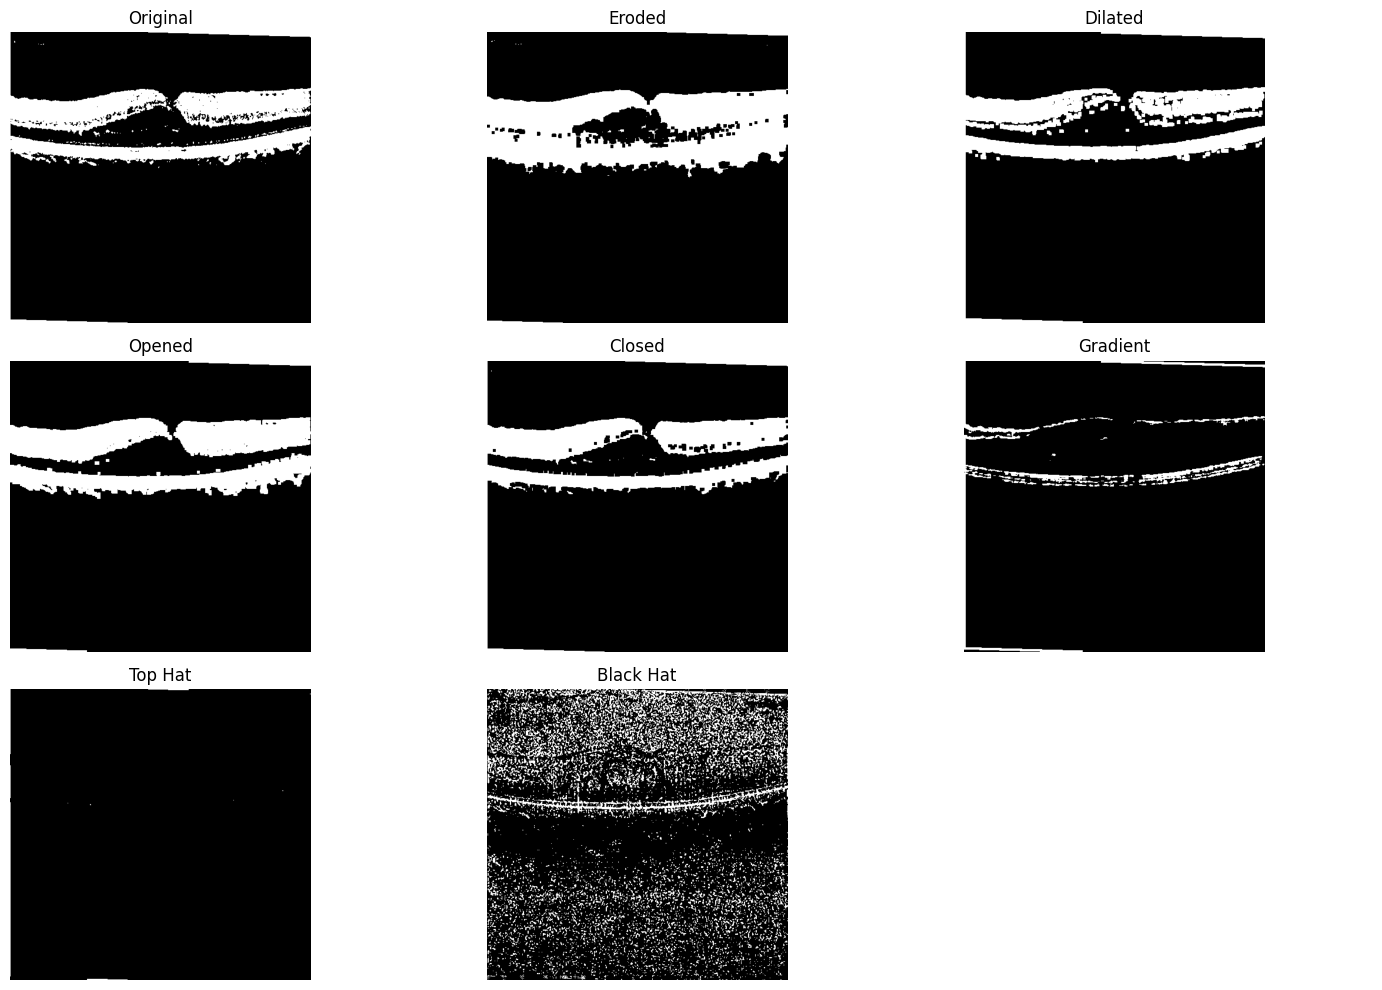

In [19]:
kernel_size = 5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))  # elemento estruturante
print(kernel)

image = np.array(img)
eroded = cv2.erode(image, kernel, iterations=1)
dilated = cv2.dilate(image, kernel, iterations=1)

opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)


images = [image, eroded, dilated, opened, closed, gradient, tophat, blackhat]
segs = [ otsu(Image.fromarray(i)) for i in images]


titulos = ["Original", "Eroded", "Dilated", "Opened", "Closed", "Gradient", "Top Hat", "Black Hat"]

fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # Adjust grid size
for i in range(len(images)):
    axs[i // 3, i % 3].imshow(segs[i], cmap="gray")
    axs[i // 3, i % 3].set_title(titulos[i])
    axs[i // 3, i % 3].axis("off")

# Hide any extra empty subplots
for j in range(len(images), 9):
    axs[j // 3, j % 3].axis("off")

plt.tight_layout()
plt.show()


### ES: Retangular

1. Mediana 
2. CLAHE 
3. Otsu 
4. OPEN 
5. CLOSE


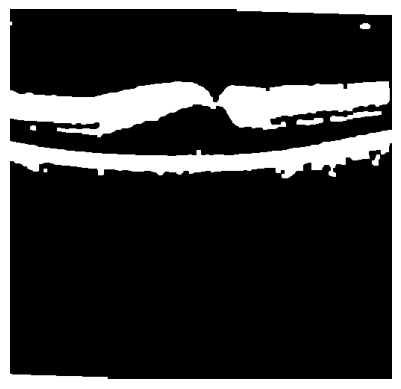

1. Mediana 
2. CLAHE 
3. Otsu 
4. CLOSE 
5. OPEN


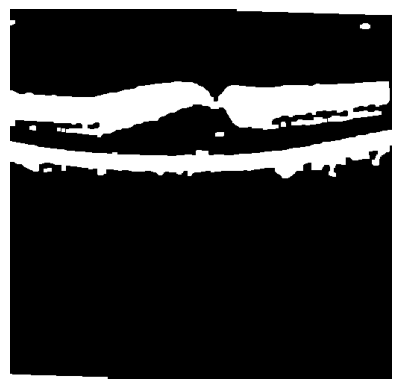

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
T3 = transforms.Compose([
    transforms.Lambda(lambda x: median_filter(x)),
    transforms.Lambda(lambda x: clahe(x)),
    transforms.Lambda(lambda x: otsu(x)),
    
    transforms.Lambda(lambda x: np.array(x)),
    transforms.Lambda(lambda x: cv2.morphologyEx(x, cv2.MORPH_OPEN, kernel)),
    transforms.Lambda(lambda x: cv2.morphologyEx(x, cv2.MORPH_CLOSE, kernel)),
    ])

T4 = transforms.Compose([
    transforms.Lambda(lambda x: median_filter(x)),
    transforms.Lambda(lambda x: clahe(x)),
    transforms.Lambda(lambda x: otsu(x)),
    
    transforms.Lambda(lambda x: np.array(x)),
    transforms.Lambda(lambda x: cv2.morphologyEx(x, cv2.MORPH_CLOSE, kernel)),
    transforms.Lambda(lambda x: cv2.morphologyEx(x, cv2.MORPH_OPEN, kernel)),
    ])

print("1. Mediana \n2. CLAHE \n3. Otsu \n4. OPEN \n5. CLOSE")
plot_image(np.array(T3(img)), title_image=None)

print("1. Mediana \n2. CLAHE \n3. Otsu \n4. CLOSE \n5. OPEN")
plot_image(np.array(T4(img)), title_image=None)


### ES: Elipse

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
1. Mediana 
2. CLAHE 
3. Otsu 
4. OPEN 
5. CLOSE


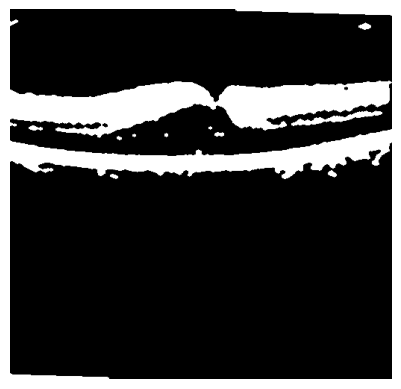

1. Mediana 
2. CLAHE 
3. Otsu 
4. CLOSE 
5. OPEN


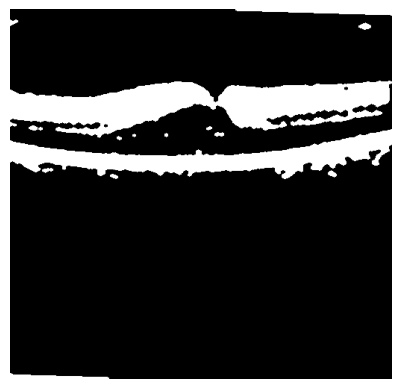

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
print(kernel)
T3 = transforms.Compose([
    transforms.Lambda(lambda x: median_filter(x)),
    transforms.Lambda(lambda x: clahe(x)),
    transforms.Lambda(lambda x: otsu(x)),
    
    transforms.Lambda(lambda x: np.array(x)),
    transforms.Lambda(lambda x: cv2.morphologyEx(x, cv2.MORPH_OPEN, kernel)),
    transforms.Lambda(lambda x: cv2.morphologyEx(x, cv2.MORPH_CLOSE, kernel)),
    ])

T4 = transforms.Compose([
    transforms.Lambda(lambda x: median_filter(x)),
    transforms.Lambda(lambda x: clahe(x)),
    transforms.Lambda(lambda x: otsu(x)),
    
    transforms.Lambda(lambda x: np.array(x)),
    transforms.Lambda(lambda x: cv2.morphologyEx(x, cv2.MORPH_CLOSE, kernel)),
    transforms.Lambda(lambda x: cv2.morphologyEx(x, cv2.MORPH_OPEN, kernel)),
    ])

print("1. Mediana \n2. CLAHE \n3. Otsu \n4. OPEN \n5. CLOSE")
plot_image(np.array(T3(img)), title_image=None)

print("1. Mediana \n2. CLAHE \n3. Otsu \n4. CLOSE \n5. OPEN")
plot_image(np.array(T4(img)), title_image=None)


### Extraia contornos da saída acima para extrair bordas da camada da retina

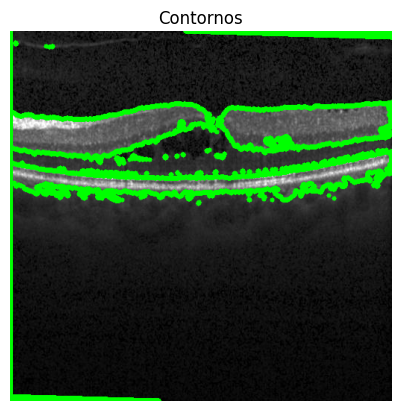

In [22]:
#TODO: perguntar ao professor como exatamente fazer isso

# extrair contornos da imagem com morfologia de fechamento
contours, _ = cv2.findContours(np.array(otsu(img)), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

border_thickness = 5
# desenhar contornos na imagem original
contour_image = cv2.drawContours(np.array(img), contours, -1, (0, 255, 0), border_thickness)
plot_image(contour_image, "Contornos")

#### Processo de Aprimoramento completo

1. Mediana 
2. CLAHE 
3. Otsu 
4. OPEN 
5. CLOSE 
6. Contornos


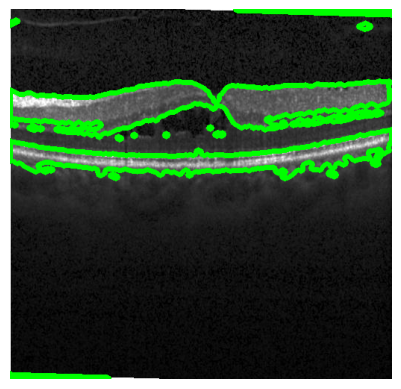

In [23]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

def suavizacao_morfologica(x, ES="ELLIPSE", kernel_size = 5):
    morph = cv2.MORPH_ELLIPSE if ES == "ELLIPSE" else cv2.MORPH_RECT
    kernel = cv2.getStructuringElement(morph, (kernel_size, kernel_size))
    x = np.array(x)
    x = cv2.morphologyEx(x, cv2.MORPH_OPEN, kernel)
    x = cv2.morphologyEx(x, cv2.MORPH_CLOSE, kernel)
    return Image.fromarray(x)

import cv2
import numpy as np

def pipe(x, border_thickness=5):
    # Aplica Otsu para binarizar a imagem
    x = np.array(x)
    original = x.copy()
    
    x = median_filter(x)
    x = clahe(x)
    x = otsu(x)
    x = suavizacao_morfologica(x)
    # plot_image(np.array(x))
    # Extrai os contornos
    contours, _ = cv2.findContours(np.array(x), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Desenha os contornos na imagem original
    contour_image = cv2.drawContours(original, contours, -1, (0, 255, 0), border_thickness)
    return contour_image


print("1. Mediana \n2. CLAHE \n3. Otsu \n4. OPEN \n5. CLOSE \n6. Contornos")
plot_image(np.array(pipe(img)), title_image=None)

